Importar librerías necesarias

In [1]:
import time  # Módulo para manejar funciones relacionadas con el tiempo, como pausas o medición de tiempos de ejecución.
import pandas as pd  # Importa la biblioteca pandas para manipulación y análisis de datos estructurados en DataFrames.
import matplotlib.pyplot as plt  # Módulo de Matplotlib para generar gráficos y visualizaciones.
from collections import defaultdict  # Importa defaultdict de collections, útil para crear diccionarios con valores predeterminados.

Función para leer archivos .RIS y convertirlo en un DataFrame de pandas.

In [2]:
def leer_ris(ris_file):
    # Abre el archivo RIS en modo lectura con codificación UTF-8
    with open(ris_file, 'r', encoding='utf-8') as file:
        # Divide el contenido del archivo en registros usando 'ER  -' como separador
        data = file.read().split('ER  -')

    records = []  # Lista para almacenar los registros procesados

    # Itera sobre cada registro extraído del archivo
    for record in data:
        entry = defaultdict(str)  # Crea un diccionario con valores por defecto como cadenas vacías

        # Procesa cada línea del registro actual
        for line in record.strip().split('\n'):
            if line and len(line) > 6:  # Verifica que la línea no esté vacía y tenga al menos 6 caracteres
                key, value = line[:2], line[6:].strip()  # Extrae la clave (primeros 2 caracteres) y el valor (desde el índice 6)
                entry[key] += value + ' '  # Agrega el valor a la clave correspondiente en el diccionario

        if entry:  # Si el diccionario no está vacío, lo añade a la lista de registros
            records.append(entry)

    # Convierte la lista de diccionarios en un DataFrame de pandas y lo retorna
    return pd.DataFrame(records)

Funciones de ordenamiento con medición de tiempo

In [3]:
def medir_tiempo(algoritmo, datos):
    inicio = time.time()  # Captura el tiempo de inicio
    algoritmo(datos.copy())  # Ejecuta el algoritmo con una copia de los datos
    fin = time.time()  # Captura el tiempo de finalización
    return fin - inicio  # Calcula y retorna la diferencia de tiempo

1. TimSort O(n log n)

In [4]:
def timsort(arr):
    return sorted(arr)  # Utiliza la función integrada sorted() de Python, que usa TimSort internamente.

2. Comb Sort O(n²)

In [5]:
def comb_sort(arr):
    gap = len(arr)  # Inicializa el "gap" con el tamaño del arreglo
    shrink = 1.3  # Factor de reducción recomendado para Comb Sort
    sorted_flag = False  # Bandera que indica si la lista ya está ordenada

    while not sorted_flag:
        gap = int(gap / shrink)  # Reduce el gap en cada iteración
        if gap <= 1:  # Cuando el gap es 1, el algoritmo se comporta como Bubble Sort
            gap = 1
            sorted_flag = True  # Se asume que la lista está ordenada

        i = 0  # Índice para recorrer la lista
        while i + gap < len(arr):  # Compara elementos separados por el gap
            if arr[i] > arr[i + gap]:  # Si están desordenados, los intercambia
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted_flag = False  # Si hubo intercambio, la lista aún no está ordenada
            i += 1  # Avanza al siguiente par de elementos

    return arr  # Retorna la lista ordenada

3. Selection Sort O(n²)

In [6]:
def selection_sort(arr):
    # Itera sobre cada posición en la lista
    for i in range(len(arr)):
        min_idx = i  # Se asume que el elemento en la posición i es el menor

        # Busca el menor elemento en el resto de la lista
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:  # Si encuentra un elemento menor, actualiza min_idx
                min_idx = j

        # Intercambia el elemento mínimo encontrado con el elemento en la posición i
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

    return arr  # Retorna la lista ordenada

4. Tree Sort O(n log n)

In [7]:
class TreeNode:

#Representar un nodo de un árbol binario de búsqueda (BST).

    def __init__(self, value):
        self.left = None   # Hijo izquierdo
        self.right = None  # Hijo derecho
        self.value = value # Valor del nodo

#Insertar un nuevo valor en el árbol binario de búsqueda (BST).

def insert(root, value):
    if root is None:  # Si el árbol está vacío, crea un nuevo nodo
        return TreeNode(value)
    else:
        if value < root.value:  # Si el valor es menor, insertarlo en el subárbol izquierdo
            root.left = insert(root.left, value)
        else:  # Si el valor es mayor o igual, insertarlo en el subárbol derecho
            root.right = insert(root.right, value)
    return root  # Retornar la raíz del árbol actualizado

#Realizar un recorrido en orden (inorder) del árbol para obtener una lista ordenada.

def inorder_traversal(root, sorted_list):
    if root:  # Si el nodo no es None
        inorder_traversal(root.left, sorted_list)  # Visitar el subárbol izquierdo
        sorted_list.append(root.value)  # Agregar el valor del nodo a la lista
        inorder_traversal(root.right, sorted_list)  # Visitar el subárbol derecho

#Implementación del algoritmo de ordenamiento Tree Sort.

def tree_sort(arr):
    if not arr:  # Si la lista está vacía, retornar la lista vacía
        return arr

    root = None  # Inicializar el árbol vacío

    # Insertar todos los elementos del arreglo en el árbol binario de búsqueda
    for value in arr:
        root = insert(root, value)

    sorted_list = []  # Lista donde se almacenarán los valores ordenados
    inorder_traversal(root, sorted_list)  # Realizar recorrido inorder para obtener la lista ordenada

    return sorted_list  # Retornar la lista ordenada

5. Pigeonhole Sort O(n + Range)

In [8]:
def pigeonhole_sort(arr):
    if not arr:  # Si la lista está vacía, retornar la misma lista
        return arr

    # Convertir valores a un rango manejable si contienen texto u otros tipos de datos no numéricos
    arr = [abs(hash(x)) % 1000 for x in arr]  # Limita los valores al rango [0, 999]

    min_val = min(arr)  # Encontrar el valor mínimo
    max_val = max(arr)  # Encontrar el valor máximo

    size = max_val - min_val + 1  # Determinar el número de "huecos" (pigeonholes)

    # Crear una lista de contadores (huecos)
    holes = [0] * size

    # Contar cuántas veces aparece cada número
    for number in arr:
        holes[number - min_val] += 1

    sorted_list = []  # Lista donde se almacenará el resultado ordenado

    # Recorrer los "huecos" y reconstruir la lista ordenada
    for i in range(size):
        sorted_list.extend([i + min_val] * holes[i])  # Agregar el número repetido según su cuenta

    return sorted_list  # Retornar la lista ordenada

6. BucketSort O(n + k)

In [9]:
def bucket_sort(arr):
    if not arr:  # Si la lista está vacía, retornarla directamente
        return arr

    # Convertir valores a un rango manejable si contienen texto u otros tipos de datos no numéricos
    arr = [abs(hash(x)) % 1000 for x in arr]  # Normaliza los valores al rango [0, 999]

    # Crear una lista de cubos vacíos
    bucket = [[] for _ in range(len(arr))]

    # Distribuir los elementos en los cubos correspondientes
    for num in arr:
        index = int(num * len(arr) / 1000)  # Determinar el índice del cubo
        bucket[index].append(num)

    # Ordenar individualmente cada cubo
    for b in bucket:
        b.sort()

    # Concatenar los cubos ordenados en una sola lista
    return [item for sublist in bucket for item in sublist]

7. QuickSort O(n log n)

In [10]:
def quicksort(arr):
    if len(arr) <= 1:  # Caso base: si la lista tiene 1 o 0 elementos, ya está ordenada
        return arr

    pivot = arr[len(arr) // 2]  # Seleccionar un pivote (en este caso, el elemento central)

    # Dividir la lista en tres partes: menores, iguales y mayores al pivote
    left = [x for x in arr if x < pivot]   # Elementos menores al pivote
    middle = [x for x in arr if x == pivot]  # Elementos iguales al pivote
    right = [x for x in arr if x > pivot]   # Elementos mayores al pivote

    # Aplicar recursivamente QuickSort y combinar los resultados
    return quicksort(left) + middle + quicksort(right)

8. HeapSort O(n log n)

In [11]:
#Función auxiliar para mantener la propiedad del Heap

def heapify(arr, n, i):
    largest = i  # Inicializar el nodo padre como el mayor
    l = 2 * i + 1  # Índice del hijo izquierdo
    r = 2 * i + 2  # Índice del hijo derecho

    # Comparar con el hijo izquierdo
    if l < n and arr[l] > arr[largest]:
        largest = l

    # Comparar con el hijo derecho
    if r < n and arr[r] > arr[largest]:
        largest = r

    # Si el nodo padre no es el mayor, intercambiarlo con el mayor hijo y continuar la corrección
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Intercambio
        heapify(arr, n, largest)  # Aplicar heapify de forma recursiva en el nodo afectado

#Implementación del algoritmo de ordenamiento HeapSort.

def heapsort(arr):
    n = len(arr)

    # Construcción del Max-Heap (se empieza desde los nodos internos hacia arriba)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extraer elementos uno por uno del heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Mover la raíz (máximo) al final del array
        heapify(arr, i, 0)  # Aplicar heapify en el heap reducido

    return arr

9. Bitonic Sort O(log² n)

In [12]:
#Función recursiva que ordena un segmento de la lista en orden bitónico.

def bitonic_sort(arr, low, cnt, direction):
    if cnt > 1:
        k = cnt // 2
        bitonic_sort(arr, low, k, 1)  # Ordenar primera mitad en ascendente
        bitonic_sort(arr, low + k, k, 0)  # Ordenar segunda mitad en descendente
        bitonic_merge(arr, low, cnt, direction)  # Fusionar en la dirección deseada

#Función que mezcla dos secuencias bitónicas en una secuencia ordenada.

def bitonic_merge(arr, low, cnt, direction):
    if cnt > 1:
        k = cnt // 2
        for i in range(low, low + k):
            if (direction == 1 and arr[i] > arr[i + k]) or (direction == 0 and arr[i] < arr[i + k]):
                arr[i], arr[i + k] = arr[i + k], arr[i]  # Intercambio si es necesario
        bitonic_merge(arr, low, k, direction)  # Mezclar primera mitad
        bitonic_merge(arr, low + k, k, direction)  # Mezclar segunda mitad

#Función envolvente que ejecuta Bitonic Sort en un array de cualquier tamaño.

def run_bitonic_sort(arr):
    arr = [abs(hash(x)) % 1000 for x in arr]  # Convertir texto a valores numéricos
    n = len(arr)

    # Ajustar la longitud de la lista a la potencia de 2 más cercana
    while (n & (n - 1)) != 0:  # Si n no es potencia de 2
        arr.append(0)
        n += 1

    bitonic_sort(arr, 0, n, 1)  # Ordenar en forma ascendente
    return arr

10. Gnome Sort O(n²)

In [13]:
def gnome_sort(arr):
    i = 0
    while i < len(arr):
        if i == 0 or arr[i] >= arr[i - 1]:
            i += 1
        else:
            arr[i], arr[i - 1] = arr[i - 1], arr[i]  # Intercambio
            i -= 1  # Retrocede un paso si hay intercambio
    return arr

11. Binary Insertion Sort O(n log n)

In [14]:
def binary_insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        left = 0
        right = i - 1

        # Búsqueda binaria para encontrar la posición correcta de 'key'
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] > key:
                right = mid - 1
            else:
                left = mid + 1

        # Insertar 'key' en la posición encontrada
        arr = arr[:left] + [key] + arr[left:i] + arr[i+1:]

    return arr

12. Radix Sort O(nk)

In [15]:
#Counting Sort utilizado como subrutina en Radix Sort.

def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # Ya que los dígitos van del 0 al 9

    # Contar la frecuencia de los dígitos en la posición actual
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    # Convertir count[i] en la posición final de este dígito en output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Construir el array ordenado basado en el dígito actual
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    # Copiar el array ordenado a arr[]
    for i in range(n):
        arr[i] = output[i]

#Implementación de Radix Sort que ordena una lista de enteros no negativos.

def radix_sort(arr):
    # Convertir cualquier tipo de dato a números (manejo de strings)
    arr = [abs(hash(x)) % 1000 for x in arr]

    # Encontrar el número más grande para conocer la cantidad de dígitos
    max_num = max(arr)

    # Aplicar Counting Sort por cada posición decimal (unidad, decena, centena...)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= 10  # Moverse a la siguiente posición decimal

    return arr

Cargar datos desde archivo .RIS

In [16]:
ris_file = "../Requisito1/articulos_unicos.ris" #Especifica la ruta del archivo RIS que contiene los datos bibliométricos.
bibliometric_data = leer_ris(ris_file) #Llama a la función leer_ris para procesar el archivo RIS y almacenar los datos en un DataFrame de pandas.

Extraer datos relevantes

In [17]:
#Etiqueta a evaluar
etiquetas = [
    "TY",  # Tipo de referencia
    "AU",  # Autor(es)
    "TI",  # Título
    "T2",  # Título de la fuente (revista/conferencia)
    "AB",  # Resumen
    "KW",  # Palabras clave
    "PY",  # Año de publicación
    "DA",  # Fecha de publicación
    "VL",  # Volumen
    "IS",  # Número de la revista
    "SP",  # Página inicial
    "EP",  # Página final
    "PB",  # Editorial
    "SN",  # ISSN o ISBN
    "DO",  # DOI
    "UR",  # URL del artículo
    "L1",  # Enlace a texto completo
    "L2",  # Enlace secundario
    "DB",  # Base de datos de origen (ej. Scopus, Web of Science)
    "C3",  # Datos adicionales (ej. tipo de estudio)
    "N1"   # Notas
]

# Verifica si la columna del dato que se quiere evaluar está presente en los datos bibliométricos.
if etiquetas[6] in bibliometric_data.columns:
    # Si la columna existe, se eliminan los valores nulos y se convierten en una lista.
    datos = bibliometric_data[etiquetas[6]].dropna().tolist()
else:
    # Si la columna no está presente, se asigna una lista vacía.
    datos = []

Probar algoritmos y medir tiempo

In [18]:
# Diccionario que almacena diferentes algoritmos de ordenamiento con su nombre como clave y la función correspondiente como valor.
algoritmos = {
    'TimSort': timsort,  # Ordenamiento híbrido basado en Merge Sort e Insertion Sort
    'Comb Sort': comb_sort,  # Variante mejorada del Bubble Sort con saltos dinámicos
    'Selection Sort': selection_sort, # Algoritmo de ordenamiento que selecciona iterativamente el elemento más pequeño y lo intercambia con el primer elemento no ordenado.
    'Tree Sort': tree_sort,  # Ordenamiento basado en la estructura de árbol binario
    'Pigeonhole Sort': pigeonhole_sort,  # Ordenamiento basado en la distribución de valores en "agujeros"
    'BucketSort': bucket_sort,  # Ordenamiento que distribuye los elementos en cubetas y luego ordena cada una
    'QuickSort': quicksort,  # Algoritmo de ordenamiento rápido basado en recursión y partición
    'HeapSort': heapsort,  # Algoritmo basado en la estructura de montículo (heap)
    'Bitonic Sort': run_bitonic_sort,  # Algoritmo especializado en hardware paralelo
    'Gnome Sort': gnome_sort,  # Algoritmo de ordenamiento basado en intercambios locales
    'Binary Insertion Sort': binary_insertion_sort,  # Variante del Insertion Sort con búsqueda binaria
    'Radix Sort': radix_sort  # Algoritmo basado en la clasificación de dígitos en diferentes niveles
}

Medir tiempos

In [19]:
# Diccionario para almacenar los tiempos de ejecución de cada algoritmo
tiempos = {}

# Iterar sobre cada algoritmo de ordenamiento y medir su tiempo de ejecución
for nombre, funcion in algoritmos.items():
    # Se mide el tiempo de ejecución pasando una copia de la lista de los datos a la función de ordenamiento
    tiempos[nombre] = medir_tiempo(lambda x: funcion(x.copy()), datos)

# Convertir los tiempos de ejecución a nanosegundos
tiempos_ns = {k: v * 1_000_000_000 for k, v in tiempos.items()}  # Convertir de segundos a nanosegundos

Visualización de resultados

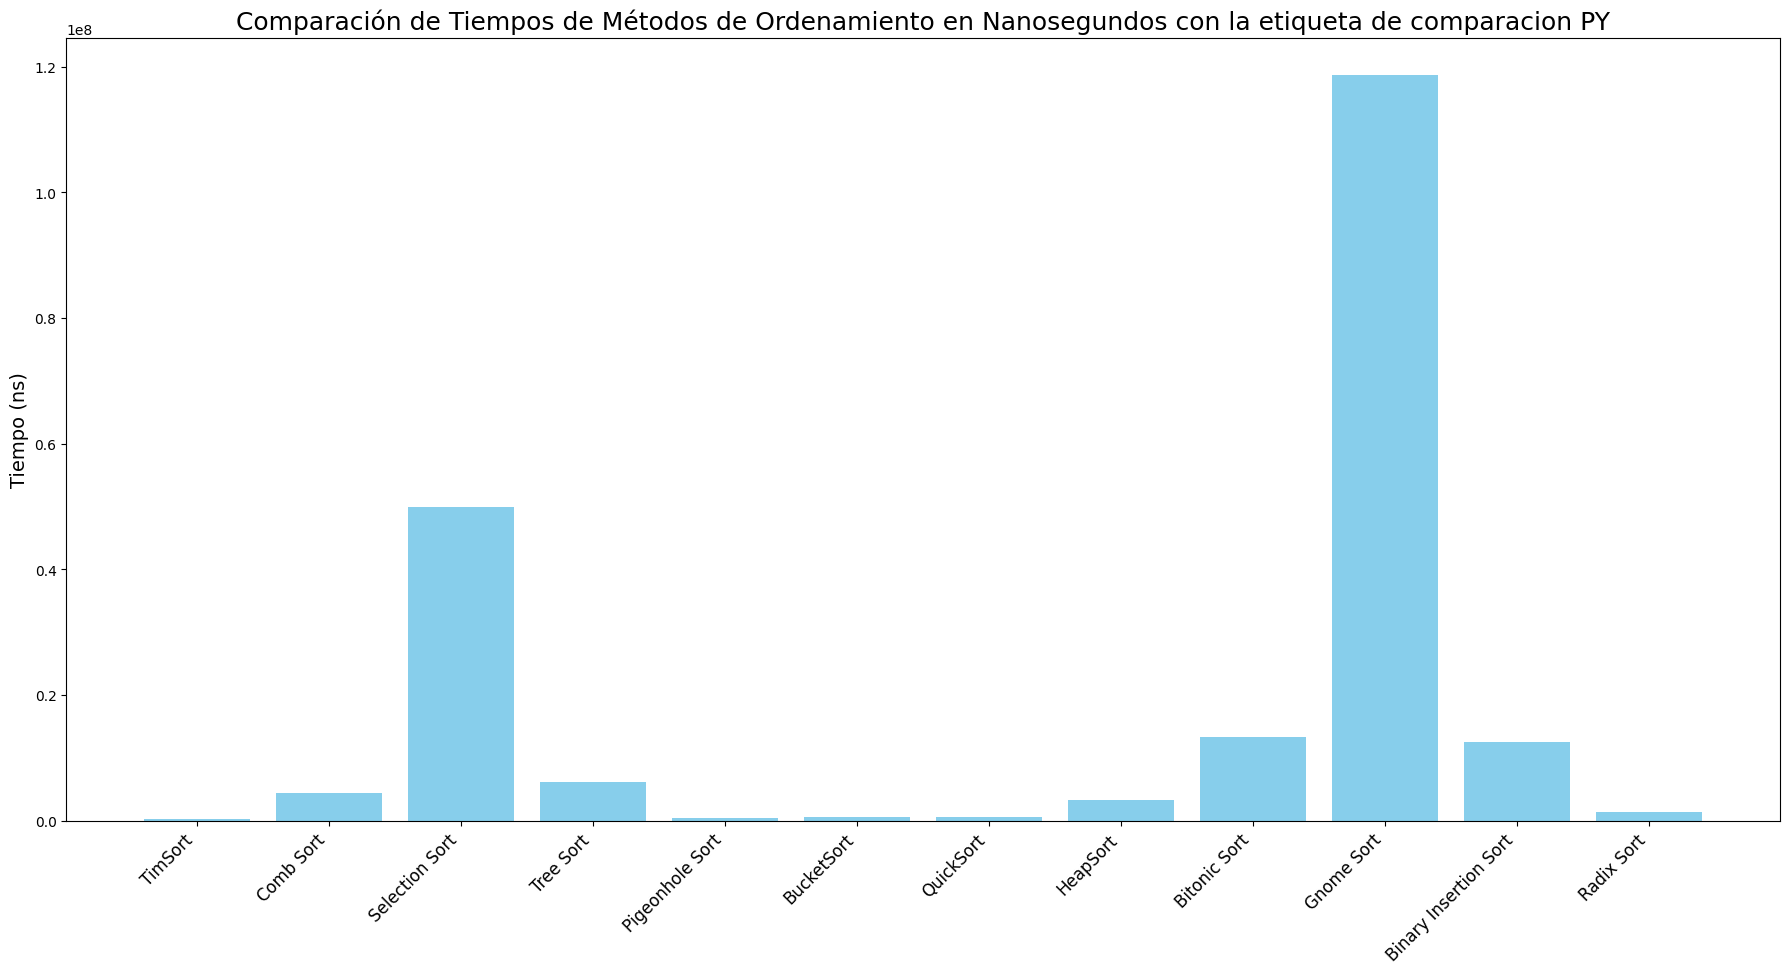

In [20]:
# Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(18, 10))  # Tamaño más grande para mayor claridad

# Crear un gráfico de barras con los tiempos de ejecución en nanosegundos
plt.bar(tiempos_ns.keys(), tiempos_ns.values(), color='skyblue')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12)

# Etiqueta del eje Y con unidad en nanosegundos y aumento de tamaño de fuente
plt.ylabel('Tiempo (ns)', fontsize=14)

# Título de la gráfica con un tamaño de fuente mayor para destacar
plt.title('Comparación de Tiempos de Métodos de Ordenamiento en Nanosegundos con la etiqueta de comparacion ' + etiquetas[6], fontsize=18)

# Ajustar el diseño automáticamente para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Imprimir tiempos en consola

In [21]:
print("Tiempos de ejecución en nanosegundos:")
for nombre, tiempo in tiempos_ns.items():
    print(f"{nombre}: {tiempo:.0f} ns")

Tiempos de ejecución en nanosegundos:
TimSort: 312328 ns
Comb Sort: 4478931 ns
Selection Sort: 50004959 ns
Tree Sort: 6156921 ns
Pigeonhole Sort: 458956 ns
BucketSort: 530481 ns
QuickSort: 646114 ns
HeapSort: 3253460 ns
Bitonic Sort: 13341904 ns
Gnome Sort: 118632555 ns
Binary Insertion Sort: 12523651 ns
Radix Sort: 1354456 ns
